<a href="https://colab.research.google.com/github/akshar99/AI-Trading/blob/main/Mini_Project_20(Pivot%2C_Resistance_Support).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from itertools import islice

In [2]:
df = pd.read_excel('/content/drive/My Drive/python/NSE 1jan-18oct correct date.xlsx')

In [3]:
nifty = df
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded',
       'Turnover (Rs. Cr)'],
      dtype='object')

In [4]:
df.describe()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
count,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000
mean,10740.618500,10824.393000,10627.406500,10721.506250,6.787893e+08,29908.728850
std,1202.256228,1152.790328,1240.383125,1195.977107,2.081293e+08,7865.208383
min,7735.150000,8036.950000,7511.100000,7610.250000,3.040780e+08,10445.680000
25%,9692.087500,9940.412500,9535.262500,9823.037500,5.561201e+08,26023.637500
50%,11154.925000,11235.000000,11083.400000,11132.675000,6.447893e+08,30292.720000
75%,11635.900000,11702.000000,11570.575000,11651.162500,7.431377e+08,34958.882500
max,12430.500000,12430.500000,12321.400000,12362.300000,1.811564e+09,61668.550000


In [5]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,2020-01-01,12202.15,12222.20,12165.30,12182.50,304078039,10445.68
1,2020-01-02,12198.55,12289.90,12195.25,12282.20,407697594,15256.55
2,2020-01-03,12261.10,12265.60,12191.35,12226.65,428770054,16827.27
3,2020-01-06,12170.60,12179.10,11974.20,11993.05,396501419,16869.22
4,2020-01-07,12079.10,12152.15,12005.35,12052.95,447818617,17797.68


In [6]:
df['Date'] = pd.to_datetime(df['Date'] , format='%Y-%m-%d')

df['Date'] = pd.to_datetime(df['Date'] , format='%d-%m-%Y')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               200 non-null    datetime64[ns]
 1   Open               200 non-null    float64       
 2   High               200 non-null    float64       
 3   Low                200 non-null    float64       
 4   Close              200 non-null    float64       
 5   Shares Traded      200 non-null    int64         
 6   Turnover (Rs. Cr)  200 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 11.1 KB


In [8]:
Date = df['Date']

In [9]:
df['Percentage Change'] = ((-df['Open'] + df['Close'])/100).astype(float)
df['Percentage Change']
df['Marker'] = np.nan

In [10]:
for i in range(len(nifty['Marker'])):
  if nifty['Percentage Change'][i] > 0:
    nifty['Marker'][i] ='Up'
  elif nifty['Percentage Change'][i] < 0:
    nifty['Marker'][i] = 'Down'
  elif nifty['Percentage Change'][i] == 0:
    nifty['Marker'][i] = 'Flat'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoi

In [11]:
df['Marker'].nunique()
df = df.drop(columns=['Marker' ] , axis =1)


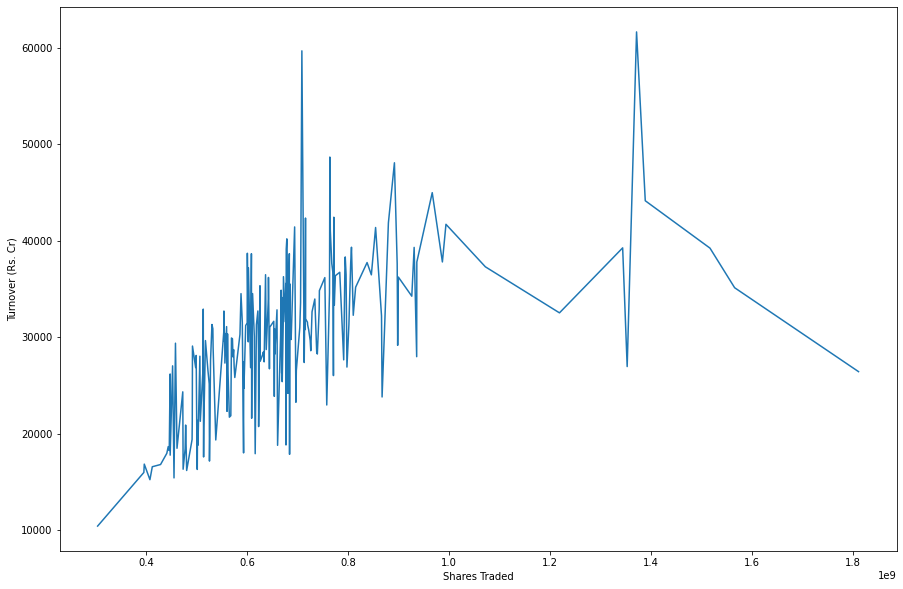

In [12]:
figdims = (15,10)
fig ,ax = plt.subplots(figsize=figdims)
sns.lineplot(x=nifty['Shares Traded'] , y=nifty['Turnover (Rs. Cr)'] , ax=ax)


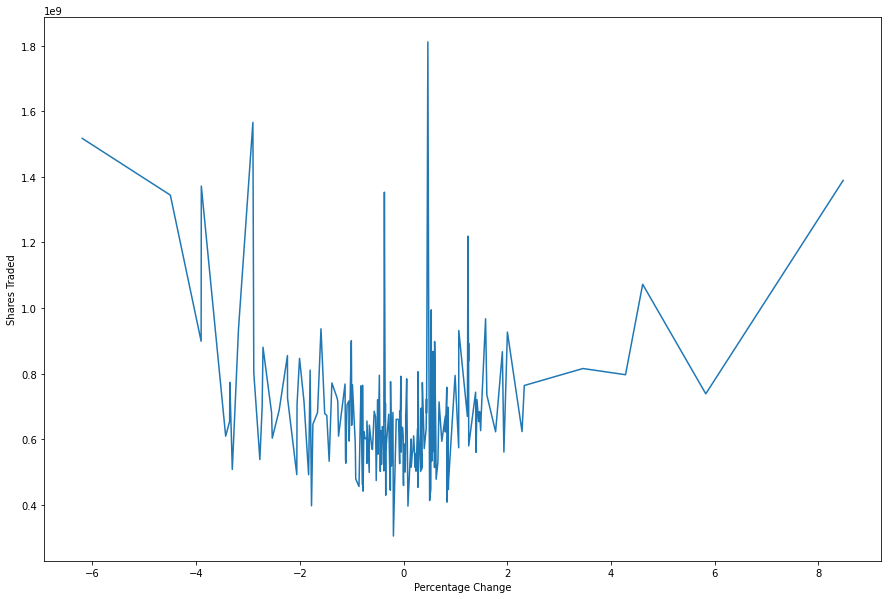

In [13]:
figdims = (15,10)
fig , ax = plt.subplots(figsize=figdims)
sns.lineplot(y=nifty['Shares Traded'] , x=nifty['Percentage Change'] , ax=ax)

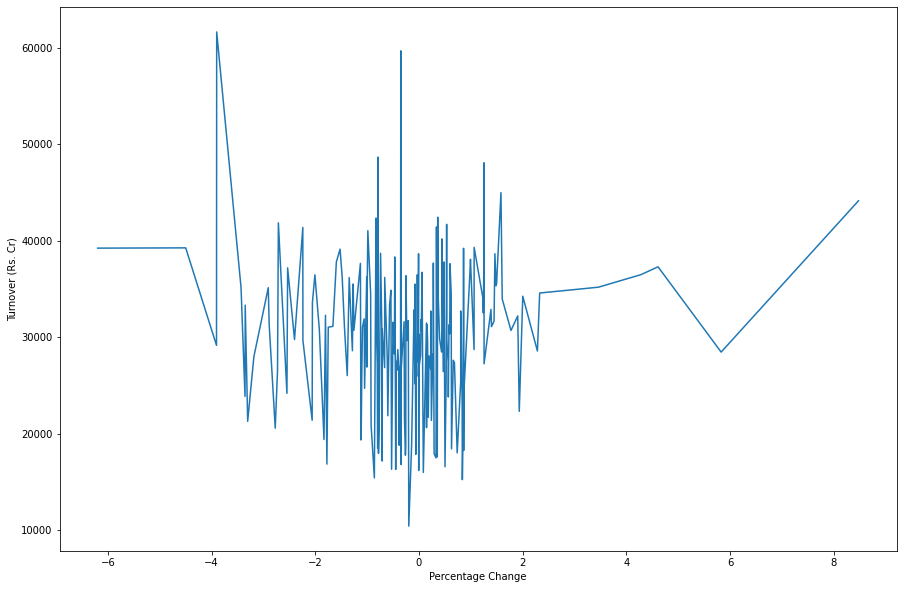

In [14]:
figdims = (15,10)
fig , ax = plt.subplots(figsize=figdims)
sns.lineplot(x=nifty['Percentage Change'] , y=nifty['Turnover (Rs. Cr)'] , ax=ax)

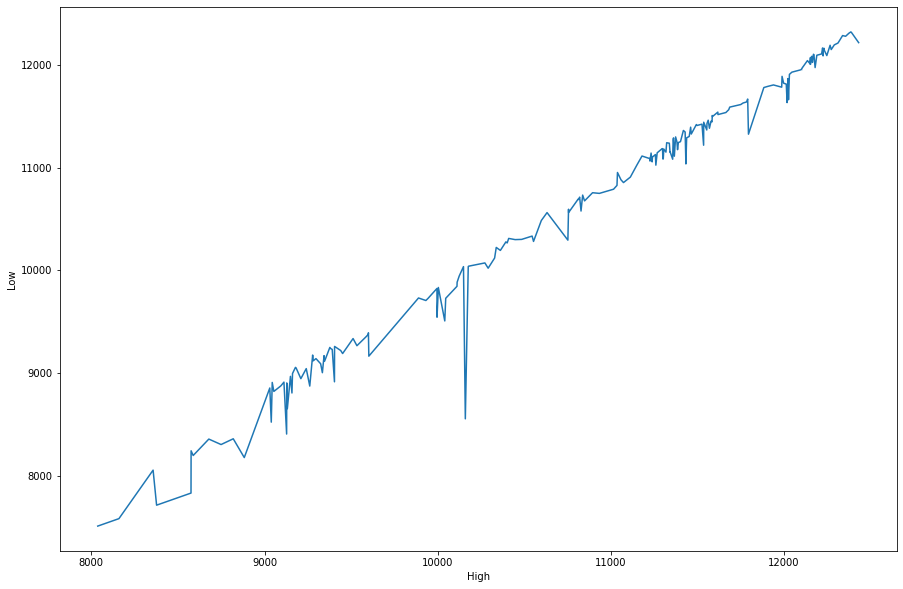

In [15]:
figdims =(15,10)
fig , ax= plt.subplots(figsize=figdims)
sns.lineplot(x='High' , y='Low' , data=nifty , ax=ax)

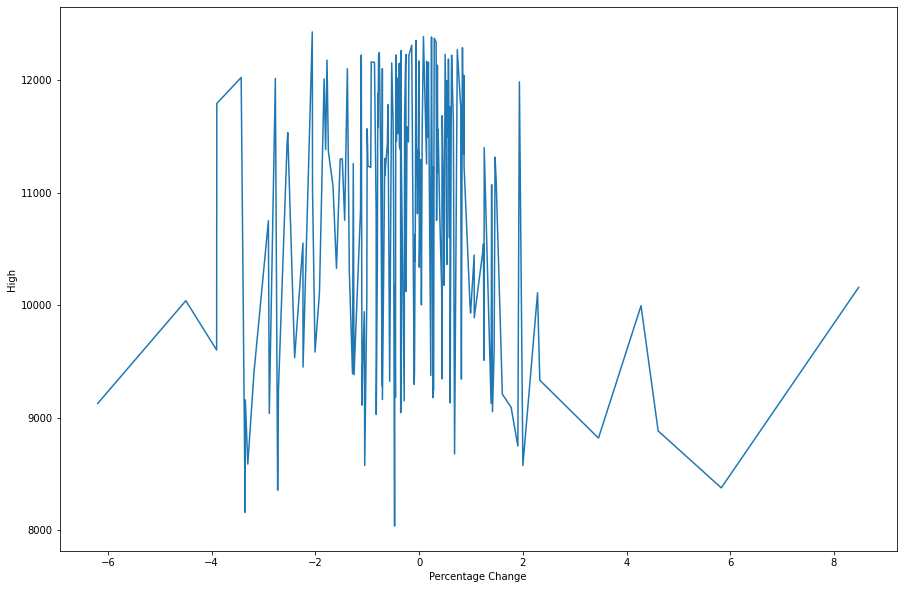

In [16]:
figdims =(15,10)
fig , ax= plt.subplots(figsize=figdims)
sns.lineplot(x='Percentage Change' , y='High' , data=nifty , ax=ax)

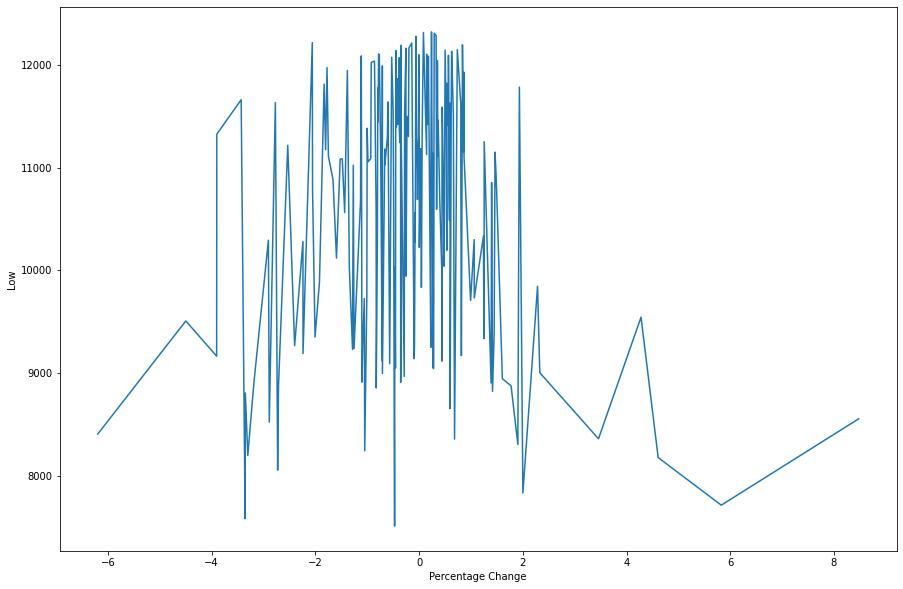

In [17]:
figdims =(15,10)
fig , ax= plt.subplots(figsize=figdims)
sns.lineplot(x='Percentage Change' , y='Low' , data=nifty , ax=ax)

Text(0.5, 1.0, 'Open/High/Close/Low')

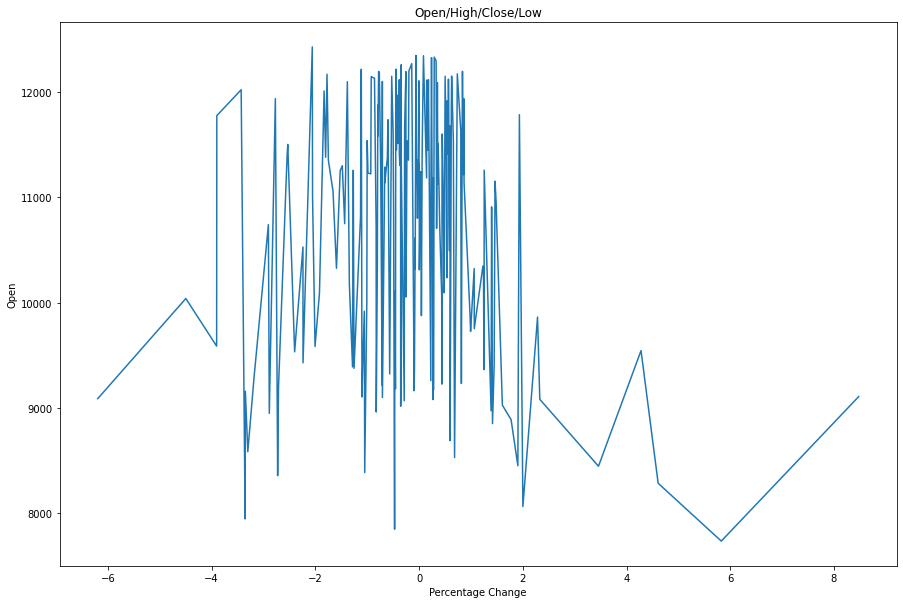

In [18]:
figdims =(15,10)
fig , ax= plt.subplots(figsize=figdims)
sns.lineplot(x='Percentage Change' , y='Open', data=nifty , ax=ax)
plt.title('Open/High/Close/Low' )

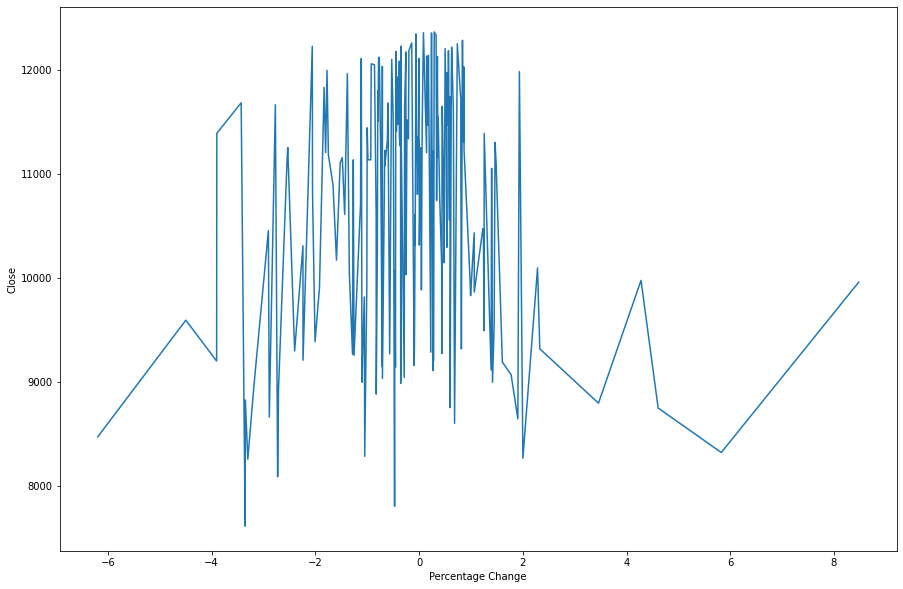

In [19]:
figdims =(15,10)
fig , ax= plt.subplots(figsize=figdims)
sns.lineplot(x='Percentage Change' , y='Close' , data=nifty , ax=ax)

In [20]:
nifty['Day'] = nifty['Date'].dt.day_name()

nifty = nifty[['Date', 'Day', 'Open', 'High', 'Low', 'Close', 'Shares Traded',
       'Turnover (Rs. Cr)', 'Percentage Change', 'Marker']]

In [21]:
nifty.to_excel('niftycorrect dataset.xlsx')

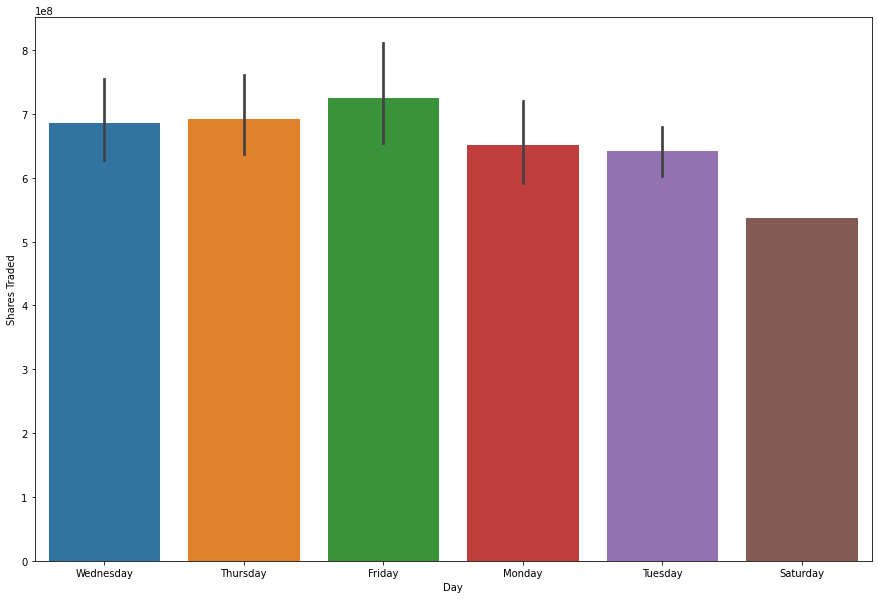

In [22]:
figdims = (15,10)
fig  , ax = plt.subplots(figsize=figdims)
sns.barplot(x='Day' , y='Shares Traded' , data= nifty , ax=ax)
plt.show()

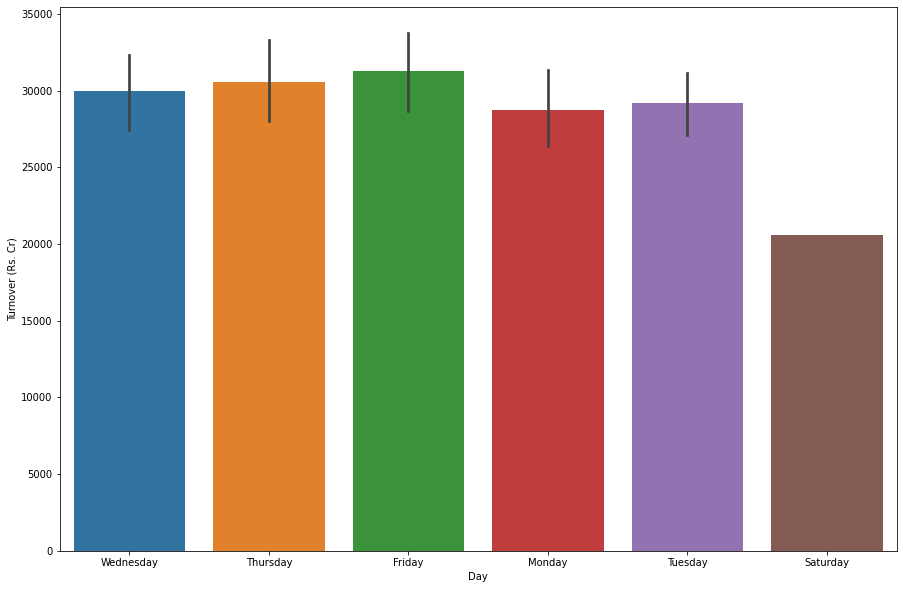

In [23]:
figdims = (15,10)
fig , ax = plt.subplots(figsize=figdims)
sns.barplot(x='Day' , y='Turnover (Rs. Cr)', data=nifty , ax=ax)
plt.show()


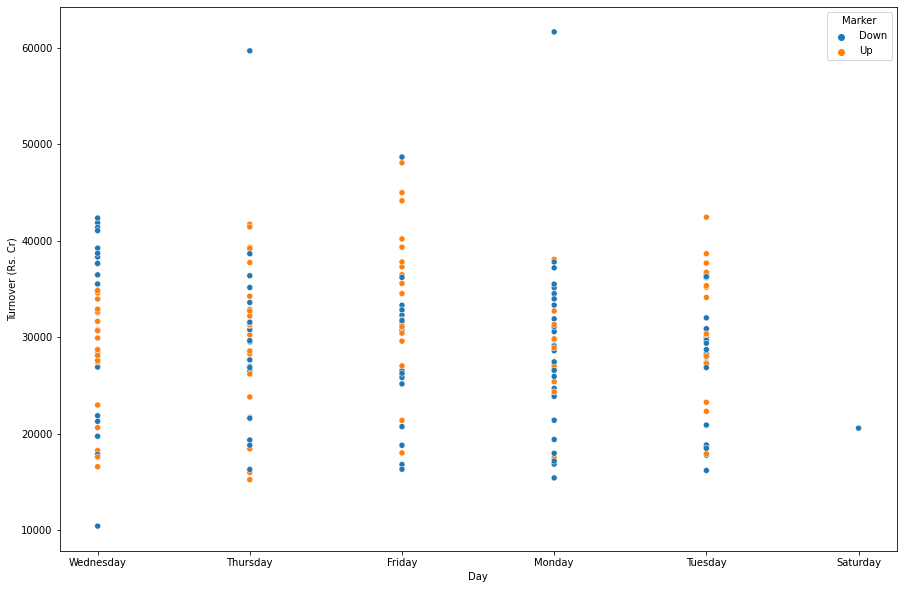

In [24]:
figdims = (15,10)
fig , ax = plt.subplots(figsize=figdims)
sns.scatterplot(x='Day' , y='Turnover (Rs. Cr)',hue='Marker', data=nifty , ax=ax)
plt.show()

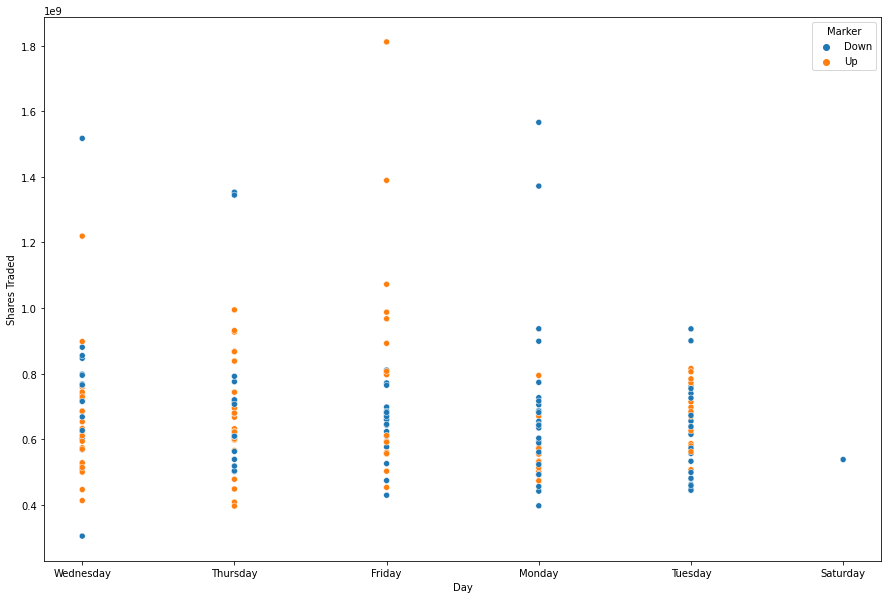

In [25]:
figdims = (15,10)
fig , ax = plt.subplots(figsize=figdims)
sns.scatterplot(x='Day' , y='Shares Traded',hue='Marker' ,data=nifty , ax=ax)
plt.show()

In [64]:
def Pivot_Convertor(a,b ,c ):
  d= []
  for i in range(len(a)):
    d.append((a[i] + b[i] + c[i])/3)
  return d

In [65]:
nifty['Pivoot'] = Pivot_Convertor(nifty['High'] , nifty['Close'] ,nifty['Low'])

nifty['Pivot'] = nifty['Pivoot']

In [69]:
#a=high , b=close , c=low , y=pivot
 
def Resistance1(c,Y):
  r1=[]  
  r1 = 2*Y-c
  return r1


def Resistance2(a,c,Y):
  r2=[]  
  r2 = Y+(a-c)
  return r2  


def Support1(b,Y):
  s1=[]  
  s1 = 2*Y-b
  return s1  


def Support2(a,c,Y):
  s2=[]  
  s2 = Y-(a-c)
  return s2      

In [70]:
nifty['R1'] = Resistance1(nifty['Low'] , nifty['Pivot'])
nifty['R2'] = Resistance2(nifty['High'] , nifty['Low'] , nifty['Pivot']) 
nifty['S1'] = Support1(nifty['Close'] , nifty['Pivot'])
nifty['S2'] = Support2(nifty['High'] , nifty['Low'] , nifty['Pivot'])

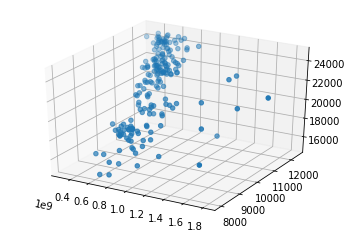

In [30]:
ax= plt.axes(projection='3d')
ax.scatter3D(nifty['Shares Traded'] ,nifty['R1'], nifty['R2'])

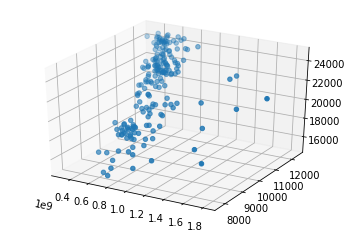

In [31]:
ax= plt.axes(projection='3d')
ax.scatter3D(nifty['Shares Traded'] ,nifty['S1'], nifty['S2'])

In [32]:
nifty = nifty.drop(['Pivoot'] , axis=1)

In [73]:
nifty['R1'] = nifty['R1'].shift(1)
nifty['Pivot'] = nifty['Pivot'].shift(1)
nifty['R2'] = nifty['R2'].shift(1)
nifty['S1'] = nifty['S1'].shift(1)
nifty['S2'] = nifty['S2'].shift(1)

In [75]:
nifty = nifty.drop(columns=['Pivoot'])

In [76]:
nifty.head()

,Date,Day,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Percentage Change,Marker,Pivot,R1,R2,S1,S2
0,2020-01-01,Wednesday,12202.15,12222.20,12165.30,12182.50,304078039,10445.68,-0.1965,Down,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,Thursday,12198.55,12289.90,12195.25,12282.20,407697594,15256.55,0.8365,Up,12190.000000,12214.700000,12246.900000,12197.500000,12133.100000
2,2020-01-03,Friday,12261.10,12265.60,12191.35,12226.65,428770054,16827.27,-0.3445,Down,12255.783333,12316.316667,12350.433333,12229.366667,12161.133333
3,2020-01-06,Monday,12170.60,12179.10,11974.20,11993.05,396501419,16869.22,-1.7755,Down,12227.866667,12264.383333,12302.116667,12229.083333,12153.616667
4,2020-01-07,Tuesday,12079.10,12152.15,12005.35,12052.95,447818617,17797.68,-0.2615,Down,12048.783333,12123.366667,12253.683333,12104.516667,11843.883333


In [72]:
nifty.describe()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Percentage Change,Pivot,R1,R2,S1,S2,Pivoot
count,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,10740.618500,10824.393000,10627.406500,10721.506250,6.787893e+08,29908.728850,-0.191123,10724.435250,10821.464000,10921.421750,10727.364250,10527.448750,10724.435250
std,1202.256228,1152.790328,1240.383125,1195.977107,2.081293e+08,7865.208383,1.603401,1194.346400,1153.665895,1115.807120,1195.572749,1288.876709,1194.346400
min,7735.150000,8036.950000,7511.100000,7610.250000,3.040780e+08,10445.680000,-6.196500,7783.033333,7985.133333,8308.883333,7765.016667,7208.716667,7783.033333
25%,9692.087500,9940.412500,9535.262500,9823.037500,5.561201e+08,26023.637500,-0.875750,9794.416667,9927.470833,10045.862500,9770.958333,9366.470833,9794.416667
50%,11154.925000,11235.000000,11083.400000,11132.675000,6.447893e+08,30292.720000,-0.068250,11157.016667,11244.675000,11313.916667,11154.525000,10961.741667,11157.016667
75%,11635.900000,11702.000000,11570.575000,11651.162500,7.431377e+08,34958.882500,0.564875,11637.004167,11696.233333,11770.275000,11621.783333,11487.012500,11637.004167
max,12430.500000,12430.500000,12321.400000,12362.300000,1.811564e+09,61668.550000,8.476000,12353.450000,12391.100000,12504.250000,12356.750000,12289.016667,12353.450000


In [63]:
nifty.columns

Index(['Date', 'Day', 'Open', 'High', 'Low', 'Close', 'Shares Traded',
       'Turnover (Rs. Cr)', 'Percentage Change', 'Marker', 'Pivot', 'R1', 'R2',
       'S1', 'S2'],
      dtype='object')

In [46]:
nifty

,Date,Day,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Percentage Change,Marker,Pivot,R1,R2,S1,S2
0,2020-01-01,Wednesday,12202.15,12222.20,12165.30,12182.50,304078039,10445.68,-0.1965,Down,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,Thursday,12198.55,12289.90,12195.25,12282.20,407697594,15256.55,0.8365,Up,24380.000000,12214.700000,24323.100000,12197.500000,24323.100000
2,2020-01-03,Friday,12261.10,12265.60,12191.35,12226.65,428770054,16827.27,-0.3445,Down,24511.566667,12316.316667,24416.916667,12229.366667,24416.916667
3,2020-01-06,Monday,12170.60,12179.10,11974.20,11993.05,396501419,16869.22,-1.7755,Down,24455.733333,12264.383333,24381.483333,12229.083333,24381.483333
4,2020-01-07,Tuesday,12079.10,12152.15,12005.35,12052.95,447818617,17797.68,-0.2615,Down,24097.566667,12123.366667,23892.666667,12104.516667,23892.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2020-10-12,Monday,11973.55,12022.05,11867.20,11930.95,522627571,26586.47,-0.4260,Down,23772.000000,11966.800000,23638.600000,11857.800000,23638.600000
196,2020-10-13,Tuesday,11934.65,11988.20,11888.90,11934.50,458304851,29403.22,-0.0015,Down,23880.133333,12012.933333,23725.283333,11949.183333,23725.283333
197,2020-10-14,Wednesday,11917.40,11997.20,11822.15,11971.05,569245407,29940.62,0.5365,Up,23874.400000,11985.500000,23775.100000,11939.900000,23775.100000
198,2020-10-15,Thursday,12023.45,12025.45,11661.30,11680.35,608865041,35175.92,-3.4310,Down,23860.266667,12038.116667,23685.216667,11889.216667,23685.216667
